# Project Overview:
The main goal of this project is to look at website recipes and try to make a prediction model that accuratly predicts high traffic 80% of the time. 

## Business goals:
Being able to predict if a recipe is high traffic or not would potentialy lead to better customer retention and possibly new customers getting subscriptions.
Also looking at what recipes perform well will tell us if we should continue to make those recipes or not. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

# import data from recipe_site_2212.csv
traffic = pd.read_csv('recipe_site_traffic_2212.csv')
clean_df = traffic
traffic

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


### Just from looking at the dataframe I am seeing null values in these columns:   
- _**recipe**_ - contains no null values  
- **_calories_** - contains null values as 'null'  
- _**carbohydrates**_ - contains null values as 'null'  
- _**sugar**_ - contains null values as 'null'  
- _**protein**_ - contains null values as 'null'  
- _**category**_ - contains no noticable null values - there could still be miss labled data 
- _**servings**_ - contains values that have strings that need to be removed  
- _**high_traffic**_ - contains null values as 'null'  

### Lets see how many null values we have -

In [2]:
print(clean_df.isnull().sum())

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


### The columns containing null values are:
- _**calories**_ - 52 null values
- _**carbohydrate**_ - 52 null values
- _**sugar**_ - 52 null values
- _**protein**_ - 52 null values
- _**high_traffic**_ - 373 null values

# -----------------------------------------------------------------------------------------------------

# Replace, Drop, or Fill Null Values

In [3]:
# Fill high_traffic with Low - this will give a bool variable to work with later
clean_df['high_traffic'] =  clean_df['high_traffic'].fillna('Low')

# remove strings from servings column
clean_df['servings'] = clean_df['servings'].str.replace('as a snack', '') # removes 'as a snack' from servings
clean_df['servings'] = clean_df['servings'].str.strip() # removes head and tail white space 

# make sure there are only 4 unique values 
print(clean_df['servings'].value_counts(dropna=False))

# seperate print statements for readability
print('---------------------------------------')

# see if there are any unusual values
print(clean_df['category'].value_counts(dropna=False))

# seperate print statements for readability
print('---------------------------------------')

# make sure there are no null values
print('Null values found in high_traffic:' , clean_df['high_traffic'].isnull().sum())


4    391
6    198
2    183
1    175
Name: servings, dtype: int64
---------------------------------------
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
---------------------------------------
Null values found in high_traffic: 0


### Explanation of the cell above:   
- Removed extra strings after a few of the values in servings.  
    - Now we can use that column for any preprocessing and model predictions.  
<br>   
<br>

- Filled null values in high_traffic with 'Low' this could be filled with just about anything.<br>   
    - We will make this column binary when we preprocess all the columns for predictions.
<br>
<br>

- Check all the columns to see if any values are missing or miss labeled. 

# -----------------------------------------------------------------------------------------------------

## Now that the high_traffic column is filled lets look at the 4 columns with 52 null values.


In [4]:
null_col = clean_df[clean_df.isnull().any(axis=1)]
print('Number of High and Low value counts :\n' , null_col['high_traffic'].value_counts())
print('----------------------------')
print('Number each category contains is associated with a null value :\n', null_col['category'].value_counts())
null_col

Number of High and Low value counts :
 High    39
Low     13
Name: high_traffic, dtype: int64
----------------------------
Number each category contains is associated with a null value :
 Pork              11
Lunch/Snacks       7
Dessert            6
Meat               5
Potato             5
Chicken            5
Vegetable          5
Chicken Breast     4
One Dish Meal      4
Name: category, dtype: int64


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


### Filling the numerical columns: 
We can see in the data that if one column is missing a value they are all missing a value. So replaceing all the values with a mean or median value might skew the data in an un-nessisary way.   
<br>
One way we could try to replace the null data is to look at the category it is connected to and average that category to get a more accuarate mean for the values. The data might still be high in variance so for now we will drop those missing values. If we get poor results in the predicitons we will revisit this and find a way to fill missing values.   



In [5]:
clean_df.dropna(inplace=True)
clean_df['recipe'].value_counts().sum()

895

The original data is 947 rows and 8 columns. After validation, there were 895 rows remaining. The following describes what I did to each column:

- **_recipe_**:  There are 895 unique values, one for each row, as expected  
- _**calories**_:  Dropped 52 missing values, filling them might lead to inaccurate predictions  
- **_carbohydrate_**:  Dropped 52 missing values, filling them might lead to inaccurate predictions  
- _**sugar**_:  Dropped 52 missing values, filling them might lead to inaccurate predictions  
- _**protein**_:  Dropped 52 missing values, filling them might lead to inaccurate predictions  
- _**category**_:  There are 9 unique values, as expected  
- _**servings**_:  Removed string 'as a snack' from 3 values, now it contains only numbers  
- _**high_traffic**_:  Converted null values to 'Low', now containes only 2 unique values  

# -----------------------------------------------------------------------------------------------------

In [6]:
new_df = clean_df.drop(['category', 'servings', 'protein', 'carbohydrate', 'sugar', 'recipe'], axis=1)
new_df_high = new_df[new_df['high_traffic'] == 'High'].replace('High', 0)
new_df_low = new_df[new_df['high_traffic'] == 'Low'].replace('Low', 1)
new_df_high.to_csv('high-traffic.csv')
new_df_low.to_csv('low-traffic.csv')
new_df_high

,calories,high_traffic
1,35.48,0
3,97.03,0
5,691.15,0
8,538.52,0
12,274.63,0
...,...,...
936,164.86,0
937,126.31,0
941,186.21,0
944,951.74,0


# Food Categories Visualization

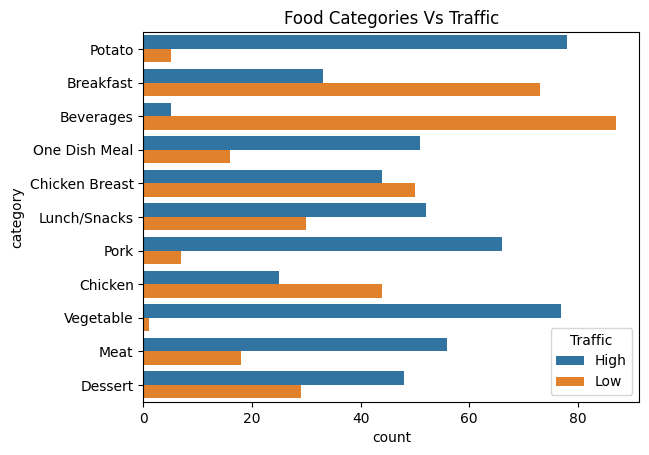

<Figure size 640x480 with 0 Axes>

In [7]:
sns.countplot(data=clean_df, y='category', hue='high_traffic')
plt.title('Food Categories Vs Traffic')
plt.legend(title='Traffic')
plt.show()
plt.clf()


## Chart Explination:  
### We can see that the top 3 highest ratio of high traffic to low traffic is:  
- _Potato_  
- _Pork_
- _Vegetable_ 
<br>   
The categories One Dish Meal, Meat, Dessert also produce high traffic. They are just at a lower ratio.     
As a base line your best chances of producing a high traffic post will be to go with the top 3 listed above.    
My goal will be to produce a more even prediction across all categories.   
<br>   
### We also see that the lowest traffic categories are:  
- _Breakfast_ 
- _Beverages_  
<br>  
Beverages have the lowest chance to produce high traffic.  
Breakfast has a better ratio than breakfast but its still not a positive ratio.  

# -----------------------------------------------------------------------------------------------------

# Serving Size Visualization

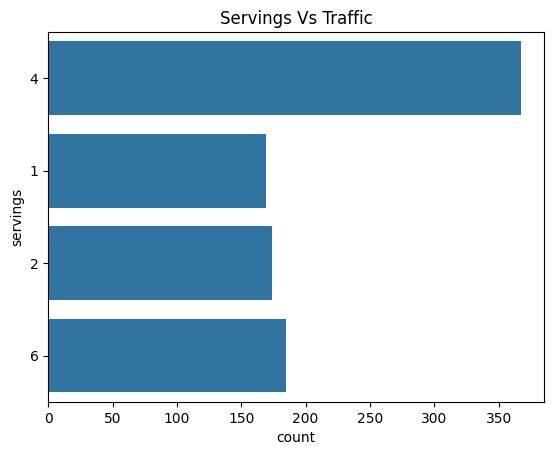

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(data=clean_df, y='servings')
plt.title('Servings Vs Traffic')
plt.show()
plt.clf()

### Chart Explination:
- 4 servings is the highest traffic of the 4 serving sizes
### what does this mean?   
- This could be because most of the people that visit the site have families.   
- It could also mean that type of recipes that serve 4 just happen to be high traffic recipies. 

# -----------------------------------------------------------------------------------------------------

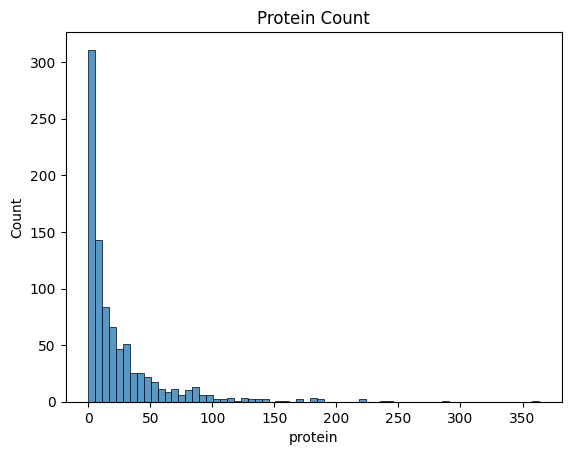

<Figure size 640x480 with 0 Axes>

In [9]:
# plot protien
sns.histplot(data=clean_df, x='protein')
plt.title('Protein Count')
plt.show()
plt.clf()

### Chart Explination: 
 - Most of the recipes that are being shown are under 25g of protien 
 - Some recipes have incredibly high amounts of protien and might be typos

# Protien Visualization: 
Protein amount might play a part in how people are choosing recipies.   
Some people might be choosing high or low amounts of protein based on diet type.  
Lets look at the protein data below. 

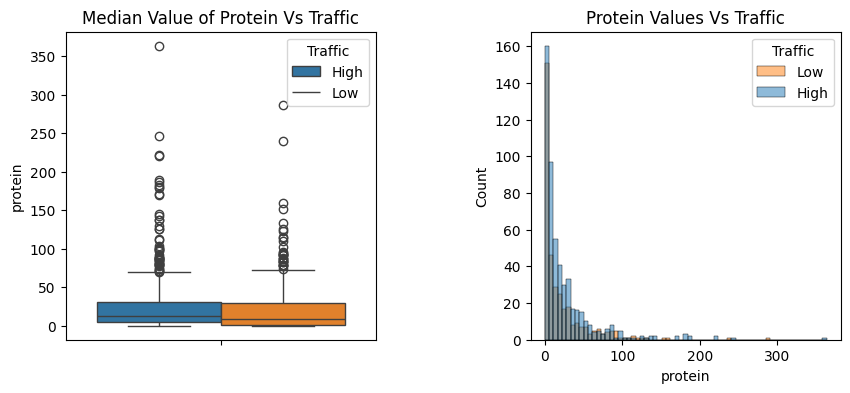

<Figure size 640x480 with 0 Axes>

In [10]:
# create a side by side plot to better explain the protein data
fig, axs = plt.subplots(1,2, figsize=(10,4))
# move the plots farther away from each other 
plt.subplots_adjust(wspace=.5)
# plot the left graph
sns.boxplot(data=clean_df, y='protein', hue='high_traffic', ax=axs[0])
# plot the right graph
sns.histplot(data=clean_df, x='protein', hue='high_traffic', ax=axs[1], fill=True)

# label the legends
axs[1].legend(title='Traffic', labels=['Low', 'High'])
axs[0].legend(title='Traffic', labels=['High', 'Low'])

# set the title of the plots
axs[0].set_title('Median Value of Protein Vs Traffic')
axs[1].set_title('Protein Values Vs Traffic')
plt.show()
plt.clf()


## Cart Explination:
###  Left Chart:
- This helps show ouliers(the circles) 
- It also shows that most of the recipes are under 30g of protien
- There is not much of a difference between recipes containing protien getting high or low traffic based on median values
<br>  
###  Right Chart:
- Right scewed - this will need to be normalized to be used in a prediction model correctly.
- We can see that their are more high traffic recipes with protien.
- It also shows that amount of protien is the same between high and low meaning it might not be a good predictor. 

# -----------------------------------------------------------------------------------------------------


# Calories Exploration: 
It is possible that people might be choosing to look at recipies that contain a certain amount of calories.   
Lets see what the distribution looks like between high and low traffic when we look at calories below.  

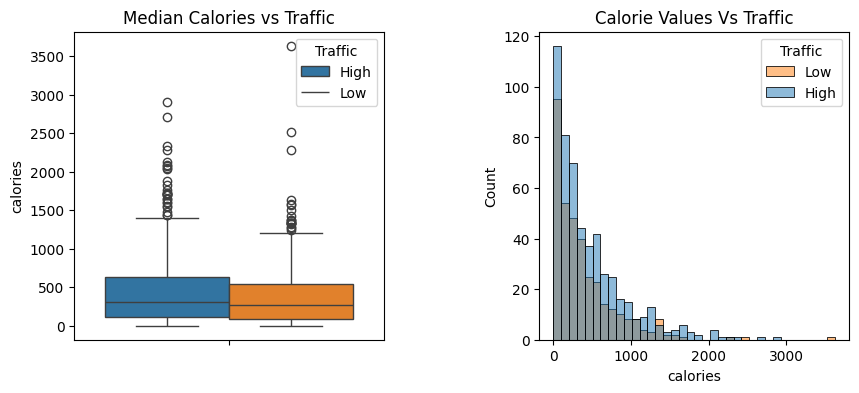

<Figure size 640x480 with 0 Axes>

In [11]:
# create a side by side plot to better explain the calories data
fig, axs = plt.subplots(1,2, figsize=(10,4))
# move the plots farther away from each other 
plt.subplots_adjust(wspace=.5)
# plot Graphs (axs[0] = left plot, axs[1]= right plot)
sns.boxplot(data=clean_df, y='calories', hue='high_traffic', ax=axs[0])
sns.histplot(data=clean_df, x='calories', hue='high_traffic', ax=axs[1], fill=True)

# set title of plots
axs[0].set_title('Median Calories vs Traffic')
axs[1].set_title('Calorie Values Vs Traffic')

# label the legends
axs[1].legend(title='Traffic', labels=['Low', 'High'])
axs[0].legend(title='Traffic', labels=['High', 'Low'])
plt.show()
plt.clf()

## Cart Explination:
###  Left Chart:
- This helps show ouliers(the circles) 
- It also shows that most of the recipes are under 750 calories. 
- There is not much of a difference between recipes calories getting high or low traffic based on median values.
- But slightly higher calories do tend to get just a hair bit more traffic.
<br>  
###  Right Chart:
- This chart shows that calories with a high traffic follows the same curve as low traffic and verifies the left chart. 

# -----------------------------------------------------------------------------------------------------

# How do all the numeric columns compare to each other?
Do any of them look like they could have clusters of high traffic to create predictions from?


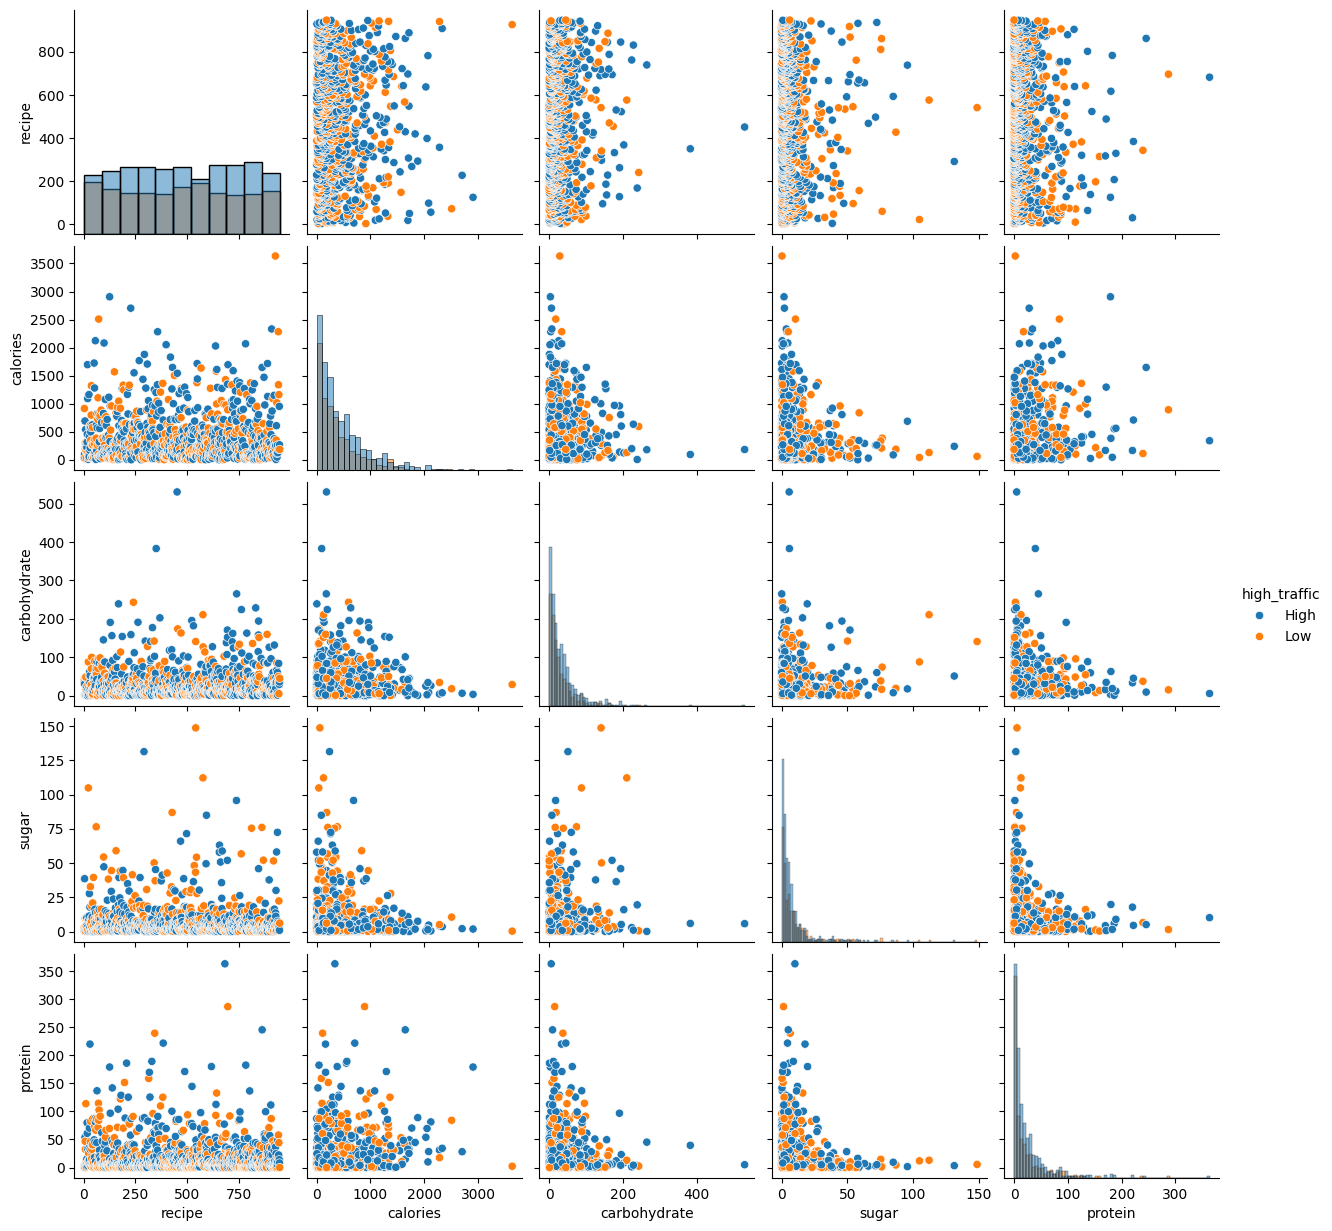

In [12]:
# show how all the numeric columns compare to eachother in scatter plots
sns.pairplot(clean_df, hue='high_traffic', diag_kind='hist')

### Chart Explination:
These charts might be hard to read so let me give some insight.  
The distribution of high and low traffic looks random across all plots. There is no defined line showing high traffic correlated to any specific column here. It might be nessisary to remove the calories, carb, protein, and sugar columns when we make our prediction model. 
<br>  
what I am seeing across all these plots is that we have between 1-7 outliers that are creating hard to see data.  

lets remove a few outliers and see if they are all the same outliers. If not we will have to keep them in order to maintain the size of data we have. 

# -----------------------------------------------------------------------------------------------------

# Are Ouliers Connected? 
### Does removing ouliers from one column remove the outliers from other columns?  
### The reason this might work is that if calories are really high we might be able to assume the other categories might also be high. 


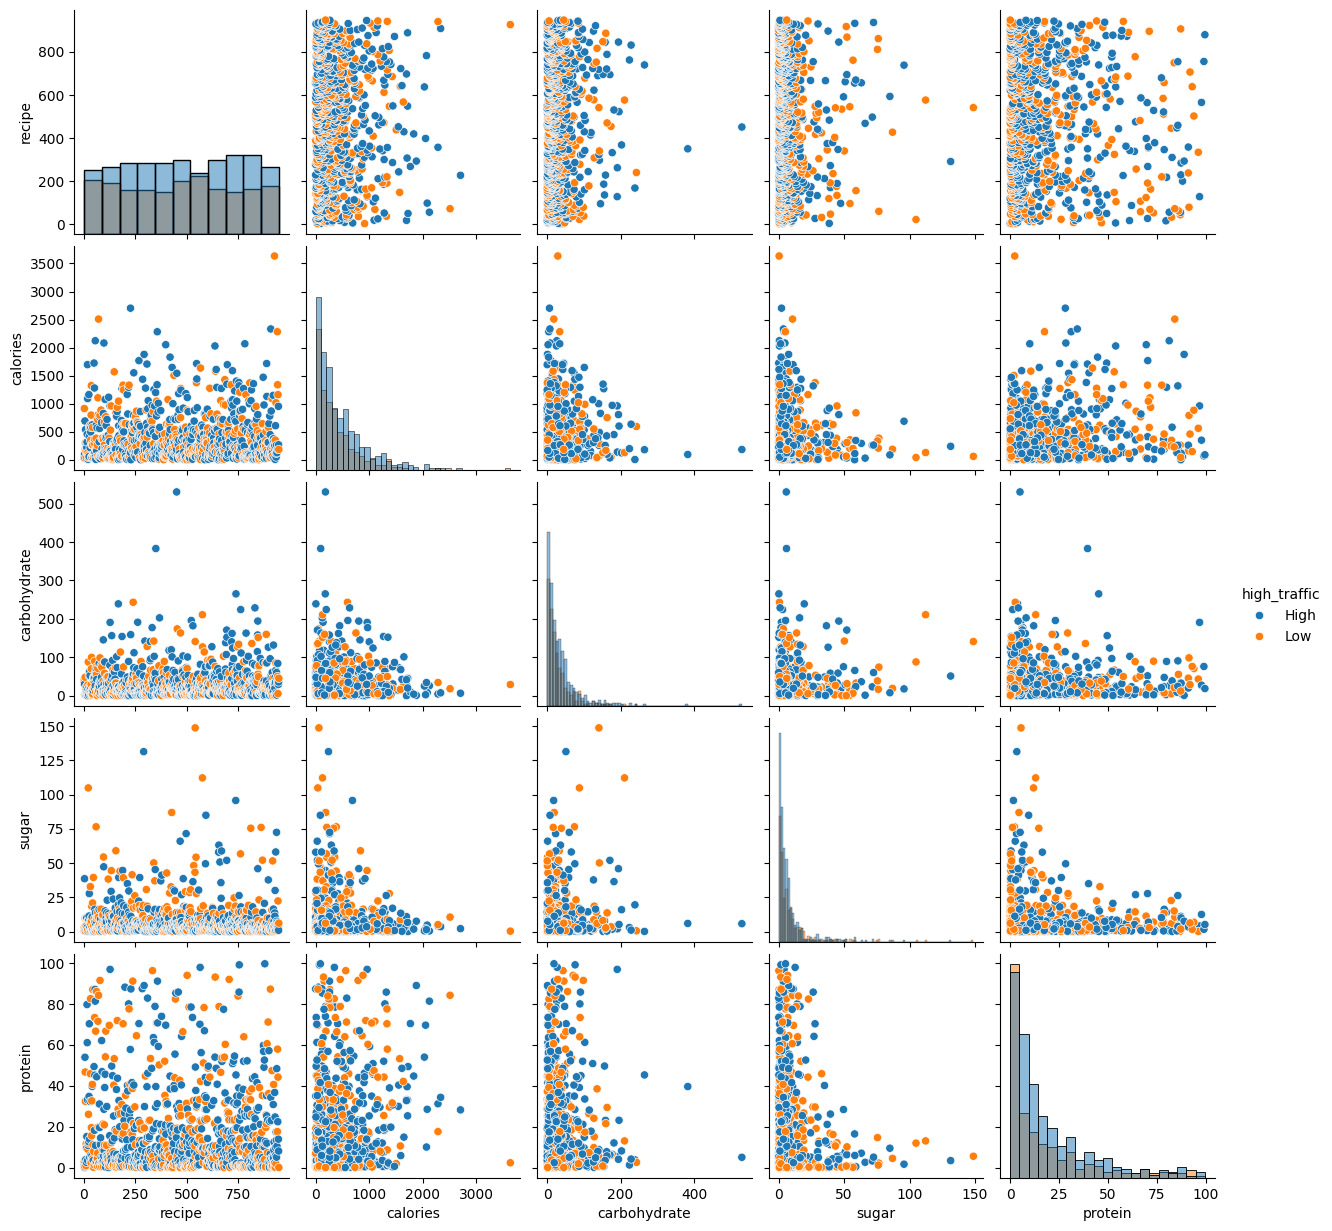

In [13]:
# does removing outliers help visualize the data
low_protein_df = clean_df[clean_df['protein'] <= 100]
sns.pairplot(data=low_protein_df, hue='high_traffic', diag_kind='hist')

### Chart Explination:
We see that elminating proteins outliers has no affect on other outliers. So we will keep the outliers or we would loose too much data. But because we have such random value distribution on nutritional values they might not be good for predictions. 

# ----------------------------------------------------------------------------------------------------

# Model Preprocessing
### We will use one hot encoding on -  
- _**category**_  
- _**servings**_  
- _**high_traffic**_  
This will turn the variables in these columns into columns themselfs with values of 0 or 1 if the variable is in that row or not.  
<br>  
### We will use MinMaxScaler on -    
- _**calories**_  
- _**carbohydrate**_  
- _**sugar**_  
- _**protein**_  
This will crunch the values down to values between 0 and 1 so we end up with a much more normalized scale of values. This is nessisary to get the model to be able to process the values easily. 


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# list all categorical/numerical columns
cat_col = ['category', 'servings']
num_col = ['calories', 'carbohydrate', 'sugar', 'protein']

cat_dummy_col = pd.get_dummies(clean_df[cat_col], drop_first=False)
clean_df['high_traffic'] = pd.get_dummies(clean_df['high_traffic'], drop_first=True)

clean_df = clean_df.drop(columns=cat_col, axis=1)
clean_df = pd.concat([cat_dummy_col, clean_df], axis=1)

clean_df

,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6,recipe,calories,carbohydrate,sugar,protein,high_traffic
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,35.48,38.56,0.66,0.92,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3,914.28,42.68,3.09,2.88,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,97.03,30.56,38.63,0.02,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,27.05,1.85,0.80,0.53,1
5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,6,691.15,3.46,1.65,53.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,942,186.21,83.94,1.98,22.40,0
942,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,943,1161.00,5.31,22.39,44.22,1
944,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,945,951.74,29.42,3.57,13.87,0
945,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,946,266.61,35.77,0.97,8.07,0


# Model Prediction:    
## Problem -   
- Can we predict high traffic recipes 80% of the time and minimize low traffic recipes.   
- This is a classic binary classification problem using the features from the website to make predictions.  

## Models -  
- **Baseline model** - DummyClassifier  
     - It is always a good idea to get a baseline model to see if just guessing a 0(High Traffic) will give us a 80% positive  prediction.   
     - In this case we will guess 'High Traffic' every time and see what percentage is a True Positive. 
     - If we can not get a model to predict anything better than just guessing we might need more data or we might need to reformat how we are selecting our features.
 
<br>  

- **Comparison model** - LogisticRegression,  RandomForest  
   - Logistic Regression - provides a straightforward binary classification. It provides probabilities and metrics for reading those probabilities. This model is computationaly effcient, can sometimes be better when working with smaller datasets than other models.
<br>  

   - Random Forest - is a classification model that can help when we have a large number of features. It is also less sensitive to outliers. It contains some feature importance which can be usefull for understanding which features should be focused on for business insight. This is not an computationaly effecient model, but can generalize new data well. 
<br>  

- **Metric** - Precision   
  - Precision will tell us if the True Positive percentage of predictions are above 80% which is what we are being requested to look for. 

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler

# split data into features and labels
x = clean_df.drop(['high_traffic', 'recipe'], axis=1)
y = clean_df['high_traffic']

# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42, stratify=y)

# scale numerical columns
scaler = MinMaxScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

# create model
dum = DummyClassifier(strategy='most_frequent')
dum.fit(x_train,y_train)
y_pred = dum.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75       134
           1       0.00      0.00      0.00        90

    accuracy                           0.60       224
   macro avg       0.30      0.50      0.37       224
weighted avg       0.36      0.60      0.45       224



### This shows that just predicting the most frequent value ('high') we get a score of 60% True Positive predictions
Just guessing high traffic for every recipe gives a 60% accuracy with this dataset. 

# Drop Unnecessary Columns:
### We will drop -  
- _**calories**_  
- _**carbohydrate**_  
- _**sugar**_  
- _**protein**_  
- _**category_Beverages**_  
These columns contain noisy data that make it hard for the model to make accurate predictions.   
The beverage category contained mostly low traffic and does not help the model predict True Positives.  
The model had a precision of **76%** before the columns were dropped.

In [16]:
# split data into features and labels
x = clean_df.drop(columns = ['high_traffic', 'calories', 'carbohydrate', 'sugar', 'protein', 'category_Beverages', 'recipe'], axis=1)
y = clean_df['high_traffic']

# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42, stratify=y)

# create model
reg = LogisticRegression(penalty='l2', C=1, solver='newton-cg')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       107
           1       0.74      0.69      0.71        72

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=90, random_state=42, max_depth=10, min_samples_leaf=10)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       107
           1       0.73      0.71      0.72        72

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# Model Evaluation:
## Logistic Regression Evaluation:  
- Metric - Precition give the True Positive prediction %  
- The model accurately predicted(Precision) the True Positive('High Traffic') 80% of the time.   
- We achieved this by removing columns that just created noise for the model giving inaccurate results.  
- The category beverages was over 90% low traffic which doesnt help us find high traffic values in this case.  
- We increased our ablility to predict True Positives by 20% from our baseline which is a big jump.
## Random Forest Classification Evaluation:  
- Metric - Precition give the True Positive prediction %  
-  This tells us that the model accurately predicted the True Positive('High Traffic') 81% of the time.  
-  It is a step up from the logistic regression model but its not much of a difference at the cost of computation time.  
-  If we added more parameters to evaluate it would continue to take longer and longer. 
-  This still gives us a model that does a little better than the goal of 80%. 


# Buisness Metrics:
- The Logistic Regression model gives the business the ability to give some advice on whether a recipe containing a category and a servings size will perform well or not. It will give this prediction with a percision percentage of 80%. With more data that has correlations to high and low traffic we can better predict what might contribute to high traffic. 
- Using this metric is still only the start of what we can do for the business. 
- If we had user data on what they like and dont like it would let us look at the recipes popularity in an even more specific way. 
- High Traffic might not always lead to subscriptions. People might be pulled in by a photo, but might not like the recipe and could move on to try a different website. Looking just a little bit deeper at what is causing the traffic in the first place might be the most usefull. 

# Conclusion: 
## Key Takeaways: 
### 1. The things that mattered the most in predicting high traffic recipes were - 
- _**meal category**_
- _**servings**_
<br>  
### 2. The type of category matters when looking at high traffic. 
- **_Potato_** , and **_vegetable_** reciepes contained the highest ratio of high traffic 
- **_Pork_** , **_meat_** , and **_one dish meals_** come in second for high traffic
- **_Dessert_**, and lunch/snack come in third for high traffic
- The other categories have a higher ratio of low traffic than high traffic
With the goal being high traffic then based on this data making a reciepe with potatos or vegetables has a very high probability that the recipe will get high traffic. Suprisingly the nutritional information had little effect on wether a recipe got high traffic or not. 

### 3. Things to avoid when making recieps.
- Beverage recipes as they have a very low chance of getting high traffic.  
- Breakfast recips also have a very low chance of getting high traffic. 

### 4. Future data collection. 
- **Time it takes to make the dish** - People might stray away from long prep time or cook time.    
- **Cost per serving or cost per dish** - High cost per serving might keep peole from using this dish.
- **# of steps to create the dish** - A large amount of steps keeps many people away from making meals.
- **# of ingredients** - Simple ingredients means people probably have them and can make the dish without going to the store. 
- **users favorite recipes** - This would lead to being able to make recommenation systems to push recipes to specific users.
- **user ratings** - Even if a recipe gets high traffic it might get good ratings. ratings would also help with recommendations.